In [1]:
import sys
sys.path.append('../../')

In [2]:
import numpy as np
import scipy.io
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
from lib.viz import plot_mattress, plot_skeleton, plot_results
from lib.constants import set_format, set_mattress_format, constants

In [3]:
set_format('slp')

In [4]:
LAB = 'danaLab'
PARTICIPANT = '00002'
COVER = 'uncover'
SAMPLE = '000014'

In [5]:
pm = np.load(f"{LAB}/{PARTICIPANT}/PMarray/{COVER}/{SAMPLE}.npy")
pm.shape

(192, 84)

In [6]:
rgb = imread(f"{LAB}/{PARTICIPANT}/RGB/{COVER}/image_{SAMPLE}.png")
rgb.shape

(1024, 576, 3)

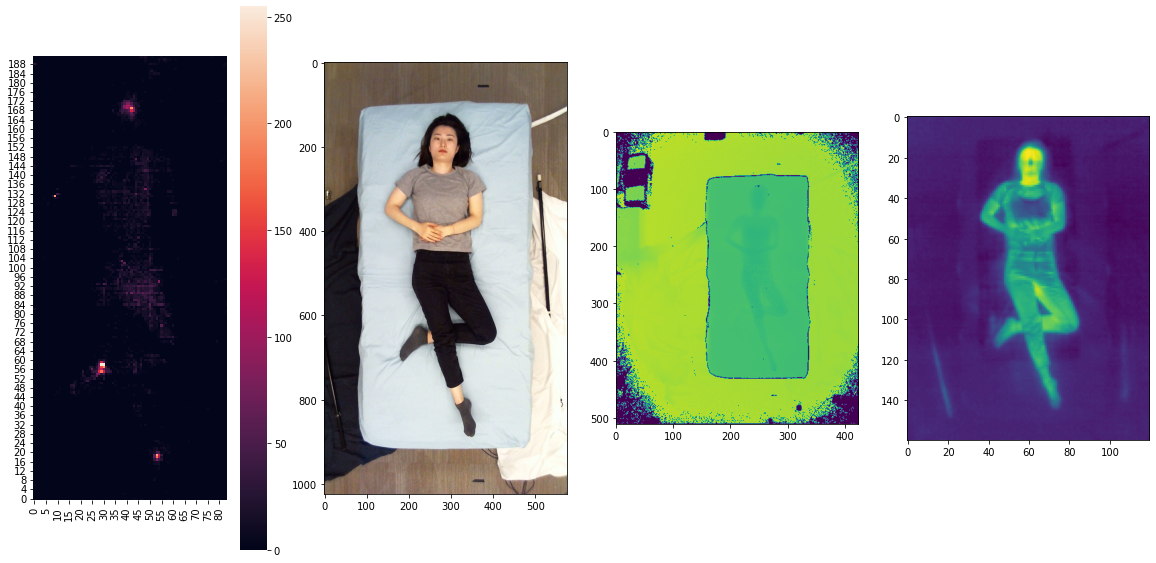

In [7]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 10)

plot_mattress(pm, ax=ax[0])

ax[1].imshow(rgb)
ax[2].imshow(imread(f"{LAB}/{PARTICIPANT}/depth/{COVER}/image_{SAMPLE}.png"))
ax[3].imshow(imread(f"{LAB}/{PARTICIPANT}/IR/{COVER}/image_{SAMPLE}.png"))

In [8]:
skeletons = np.swapaxes(scipy.io.loadmat(f"{LAB}/{PARTICIPANT}/joints_gt_RGB.mat")['joints_gt'], 0, 2)
skeletons.shape

(45, 14, 3)

In [9]:
skeleton = skeletons[int(SAMPLE)-1][:,0:2]

<AxesSubplot:>

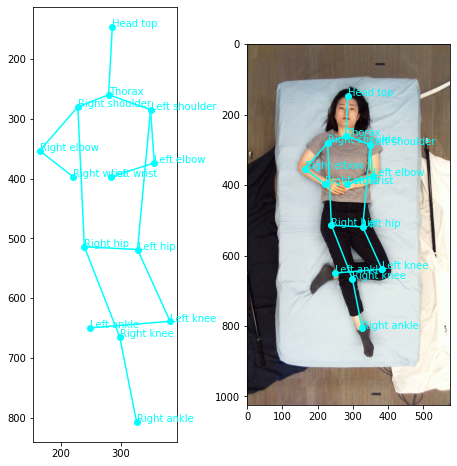

In [10]:
fig, ax = plt.subplots(1, 2)
plt.figure(1).set_size_inches(8, 8)

ax[0].invert_yaxis()
plot_skeleton(skeleton, scale_up=False, ax=ax[0])
ax[1].imshow(rgb)
plot_skeleton(skeleton, scale_up=False, ax=ax[1])

In [11]:
H_RGB = np.load(f"{LAB}/{PARTICIPANT}/align_PTr_RGB.npy")
skeleton_n = np.pad(skeleton, [(0, 0), (0, 1)], mode='constant', constant_values = (1))
skeleton_n = np.matmul(skeleton_n, np.swapaxes(H_RGB, 0, 1))
skeleton_n[:,0] /= skeleton_n[:,2] * pm.shape[1]
skeleton_n[:,1] /= skeleton_n[:,2] * pm.shape[0]
skeleton_n = skeleton_n[:,0:2]
skeleton_n[:,1] = 1 - skeleton_n[:,1]

<AxesSubplot:>

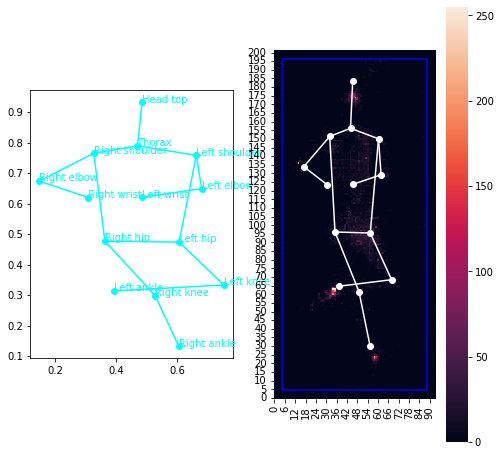

In [12]:
fig, ax = plt.subplots(1, 2)
plt.figure(1).set_size_inches(8, 8)

plot_skeleton(skeleton_n, scale_up=False, ax=ax[0])

plot_results(pm, [skeleton_n], ax=ax[1])

<AxesSubplot:>

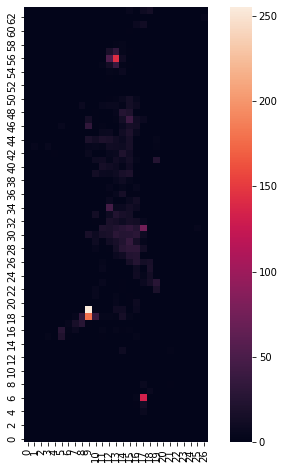

In [13]:
set_mattress_format('clever')
pm_r = cv2.resize(pm, (constants.SENSORS_X, constants.SENSORS_Y))
plt.figure(1).set_size_inches(8, 8)
plot_mattress(pm_r)

<AxesSubplot:>

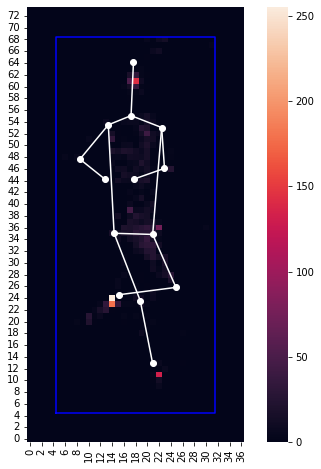

In [14]:
plt.figure(1).set_size_inches(8, 8)
plot_results(pm_r, [skeleton_n])